# SENTENCE CLASSIFICATION

## STEP 1: IMPORT LIBRARIES

In [6]:
import os
import time
import re
# import nltk
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

## STEP 2: READ THE DATA

In [7]:
def list_files_from_directory(directory):
    """Lists all file paths from given directory"""

    ret_val = []
    for file in os.listdir(directory):
        if file.endswith(".txt"):
            ret_val.append(str(directory) + "/" + str(file))
    return ret_val

In [8]:
def read_file(path):
    """Reads all lines from file on given path"""

    f = open(path, "r")
    read = f.readlines()
    ret_val = []
    for line in read:
        if line.startswith("#"):
            pass
        else:
            ret_val.append(line)
    return ret_val

In [9]:
def process_line(line):
    """Returns sentence category and sentence in given line"""

    if "\t" in line:
        splits = line.split("\t")
        s_category = splits[0]
        sentence = splits[1].lower()
        for sw in stopwords:
            sentence = sentence.replace(sw, "")
        pattern = re.compile("[^\w']")
        sentence = pattern.sub(' ', sentence)
        sentence = re.sub(' +', ' ', sentence)
        return s_category, sentence
    else:
        splits = line.split(" ")
        s_category = splits[0]
        s_category=s_category[0:4]
#         print(s_category,"else")

        sentence = line[len(s_category)+1:].lower()
        for sw in stopwords:
            sentence = sentence.replace(sw, "")
        pattern = re.compile("[^\w']")
        sentence = pattern.sub(' ', sentence)
        sentence = re.sub(' +', ' ', sentence)
        return s_category, sentence

In [10]:
def create_labels_text_file(input_folder, destination_file_data, destination_file_label):
    """Writes training data from given folder into formatted label and data text files"""

    tr_folder = list_files_from_directory(input_folder)
    data_file = []
    label_file = []
    
    for file in tr_folder:
        lines = read_file(file)
        for line in lines:
            c, s = process_line(line)
            if c.endswith('\n'):
                c = c[:-1]

            data_file.append(s)
            label_file.append(c)

    file = open(destination_file_data,"a")
    for txt in data_file:
        file.write(txt)
        file.write("\n")
    file.close()
    
    file = open(destination_file_label,"w")
    for txt in label_file:
        file.write(txt)
        file.write("\n")
    file.close()
    


In [11]:
# loading stopwords
input_stopwords = read_file("word_lists/stopwords.txt")
stopwords = []
for word in input_stopwords:
    if word.endswith('\n'):
        word = word[:-1]
        stopwords.append(word)

## READ TRAINING AND TEST DATA

In [24]:

# prepare training and test data
create_labels_text_file("training_set", "training_data.txt","training_label.txt")
create_labels_text_file("test_set", "training_data.txt","test_label.txt")

#categories, sentences = prepare_test_data("test_set")

## CONVERT TEXT DATA INTO VECTOR FORMAT

In [25]:
vectorizer = TfidfVectorizer()
vectorized_data = vectorizer.fit_transform(read_file("training_data.txt"))
train_labels=read_file("training_label.txt")
test_labels=read_file("test_label.txt")
# vectorizer2 = TfidfVectorizer(stop_words='english')
# vectorized_labels = vectorizer2.fit_transform(lab)

In [26]:
vectorized_data.shape

(3117, 3801)

In [28]:
train_data=vectorized_data[:len(train_labels)]
test_data=vectorized_data[len(train_labels):]

In [29]:
print("SHAPE OF THE TRAINING DATA IS : ",train_data.shape)
print("SHAPE OF THE TEST DATA IS",test_data.shape)
print("LENGTH OF TRAINING LABELS:",len(train_labels))
print("LENGTH OF TEST SAMPLES",len(test_labels))

SHAPE OF THE TRAINING DATA IS :  (2500, 3801)
SHAPE OF THE TEST DATA IS (617, 3801)
LENGTH OF TRAINING LABELS: 2500
LENGTH OF TEST SAMPLES 617


# NAIVE BAYES CLASSIFIER

In [30]:
def accuracy(y_label, y_pred):
    count=0
    total=len(y_label)
    for i in range(total):
        if y_label[i]==y_pred[i]:
            count+=1
            
    return float(count/total)
        

In [31]:
nbc_clf = MultinomialNB()
nbc_clf.fit(X = train_data, y = train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
nbc_predict = nbc_clf.predict(test_data)
# nbc_clf.score(test_data,test_labels)

In [33]:
print("Accuracy of N.B classisier is: ",accuracy(test_labels,nbc_predict))
print("f1(micro) score of N.B classiser is: ",f1_score(y_true=test_labels, y_pred = nbc_predict, average='micro'))
print("f1(macro) score of N.B classiser is: ",f1_score(y_true=test_labels, y_pred = nbc_predict, average='macro'))

Accuracy of N.B classisier is:  0.8152350081037277
f1(micro) score of N.B classiser is:  0.8152350081037277
f1(macro) score of N.B classiser is:  0.3350416987046786


C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

#### NB Classifier Confusion Matrix

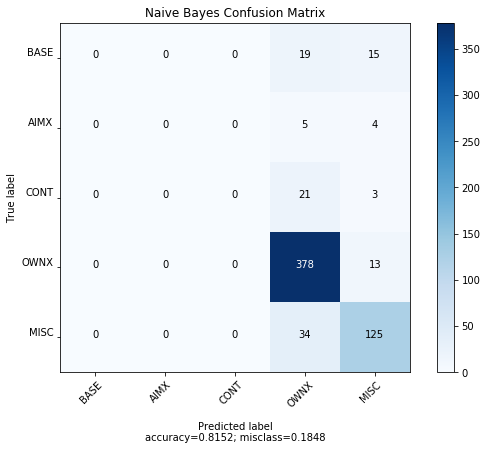

In [35]:
nbc_conf_matrix=confusion_matrix(test_labels,nbc_predict)
plot_confusion_matrix(cm           = nbc_conf_matrix, 
                      normalize    = False,
                      target_names = set(test_labels),
                      title        = "Naive Bayes Confusion Matrix")

# ROCCHIO CLASSIFIER

In [36]:
rocchio_clf = NearestCentroid()
rocchio_clf.fit(X = train_data, y = train_labels)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [37]:
rocchio_predict = rocchio_clf.predict(test_data)
#rocchio_clf.score(test_data,test_labels)

In [38]:
print("Accuracy of N.B classisier is: ",accuracy(test_labels,rocchio_predict))
print("f1(micro) score of N.B classiser is: ",f1_score(y_true=test_labels, y_pred = rocchio_predict, average='micro'))
print("f1(macro) score of N.B classiser is: ",f1_score(y_true=test_labels, y_pred = rocchio_predict, average='macro'))

Accuracy of N.B classisier is:  0.826580226904376
f1(micro) score of N.B classiser is:  0.8265802269043759
f1(macro) score of N.B classiser is:  0.5844211537396723


C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Rocchio Confusion Matrix

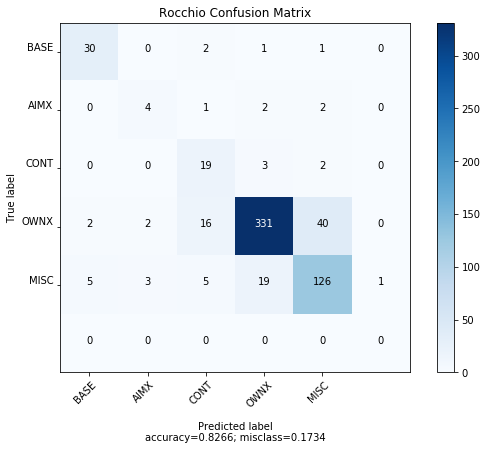

In [39]:
rocchio_conf_matrix=confusion_matrix(test_labels,rocchio_predict)
plot_confusion_matrix(cm           = rocchio_conf_matrix, 
                      normalize    = False,
                      target_names = set(test_labels),
                      title        = "Rocchio Confusion Matrix")

# kNN CLASSIFIER

In [40]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X = train_data, y = train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
knn_predict = knn_clf.predict(test_data)
# knn_clf.score(test_data,test_labels)

In [42]:
print("Accuracy of kNN classisier with k=5 is: ",accuracy(test_labels,knn_predict))
print("f1(micro) score of kNN classisier with k=5 is: ",f1_score(y_true=test_labels, y_pred = knn_predict, average='micro'))
print("f1(macro) score of kNN classisier with k=5 is: ",f1_score(y_true=test_labels, y_pred = knn_predict, average='macro'))

Accuracy of kNN classisier with k=5 is:  0.7779578606158833
f1(micro) score of kNN classisier with k=5 is:  0.7779578606158833
f1(macro) score of kNN classisier with k=5 is:  0.5712896997332854


#### knn(k=5) confusion matrix

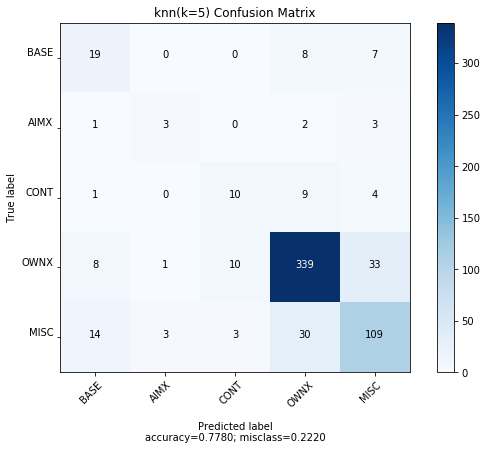

In [43]:
knn_conf_matrix=confusion_matrix(test_labels,knn_predict)
plot_confusion_matrix(cm           = knn_conf_matrix, 
                      normalize    = False,
                      target_names = set(test_labels),
                      title        = "knn(k=5) Confusion Matrix")

### knn(k=3)

In [44]:
knn3_clf = KNeighborsClassifier(n_neighbors=3)
knn3_clf.fit(X = train_data, y = train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [45]:
knn3_predict = knn3_clf.predict(test_data)

In [46]:
print("Accuracy of kNN classisier with k=3 is: ",accuracy(test_labels,knn3_predict))
print("f1(micro) score of kNN classisier with k=3 is: ",f1_score(y_true=test_labels, y_pred = knn3_predict, average='micro'))
print("f1(macro) score of kNN classisier with k=3 is: ",f1_score(y_true=test_labels, y_pred = knn3_predict, average='macro'))

Accuracy of kNN classisier with k=3 is:  0.8719611021069692
f1(micro) score of kNN classisier with k=3 is:  0.8719611021069692
f1(macro) score of kNN classisier with k=3 is:  0.7260043899234969


#### knn(k=3) confusion matrix

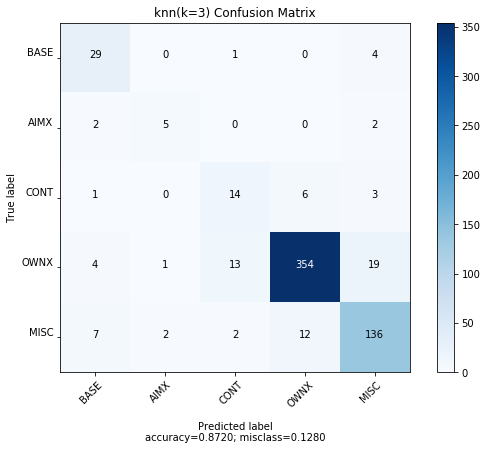

In [48]:
knn3_conf_matrix=confusion_matrix(test_labels,knn3_predict)
plot_confusion_matrix(cm           = knn3_conf_matrix, 
                      normalize    = False,
                      target_names = set(test_labels),
                      title        = "knn(k=3) Confusion Matrix")

### knn(k=7)

In [49]:
knn7_clf = KNeighborsClassifier(n_neighbors=7)
knn7_clf.fit(X = train_data, y = train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [50]:
knn7_predict = knn7_clf.predict(test_data)

In [51]:
print("Accuracy of kNN classisier with k=7 is: ",accuracy(test_labels,knn7_predict))
print("f1(micro) score of kNN classisier with k=7 is: ",f1_score(y_true=test_labels, y_pred = knn7_predict, average='micro'))
print("f1(macro) score of kNN classisier with k=7 is: ",f1_score(y_true=test_labels, y_pred = knn7_predict, average='macro'))

Accuracy of kNN classisier with k=7 is:  0.7714748784440842
f1(micro) score of kNN classisier with k=7 is:  0.7714748784440842
f1(macro) score of kNN classisier with k=7 is:  0.4539693926351028


#### knn(k=7) confusion matrix

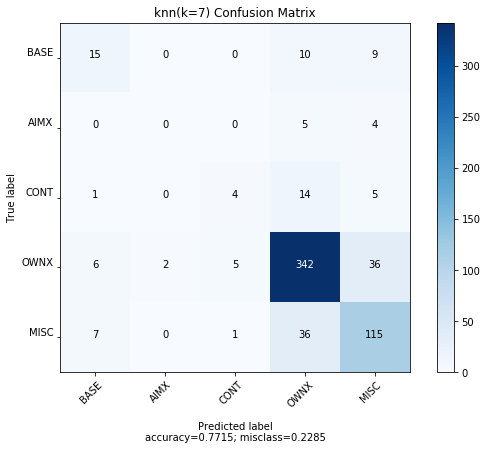

In [52]:
knn7_conf_matrix=confusion_matrix(test_labels,knn7_predict)
plot_confusion_matrix(cm           = knn7_conf_matrix, 
                      normalize    = False,
                      target_names = set(test_labels),
                      title        = "knn(k=7) Confusion Matrix")

In [53]:
print("Number of tests: " , (test_data.shape[0]))
# print("Correct tests: " + str(correct))
# accuracy = correct / len(sentences)
# print("Naive Bayes Classifier accuracy: " + str(accuracy))
# print("Testing time (in seconds): " + str(elapsed))

Number of tests:  617


In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)

In [13]:
counts = [[3, 0, 1],
...           [2, 0, 0],
...           [3, 0, 0],
...           [4, 0, 0],
...           [3, 2, 0],
...           [3, 0, 2]]

In [14]:
counts

[[3, 0, 1], [2, 0, 0], [3, 0, 0], [4, 0, 0], [3, 2, 0], [3, 0, 2]]

In [19]:
tfidf = transformer.fit_transform(counts)

In [20]:
tfidf.toarray()

array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.58149261, 0.        , 0.81355169]])